Following:

https://github.com/gsteele13/gary-misc-notebooks/blob/master/Test%20ADALM1000.ipynb

In [12]:
import pysmu
import numpy as np
import matplotlib.pyplot as plt
from time import time
import time

In [3]:
session = pysmu.Session()

In [4]:
dev =  session.devices[0]
chA = dev.channels["A"]

In [5]:
print(session.devices)
print(len(session.devices))
print(session.devices[0])

(<pysmu.libsmu.SessionDevice object at 0x00000213455BD5E0>,)
1
serial 2031205051485435313330323030323 : fw 2.17 : hw F


In [6]:
# Put channel in "source current, measure voltage"
chA.mode = pysmu.Mode.SIMV

In [65]:
# Set the current to 4 mA? 
chA.constant(2e-3)

In [73]:
# Get 10 samples
chA.get_samples(10)

[(2.1192617416381836, 0.0021075261756777763),
 (2.119809150695801, 0.001966185634955764),
 (2.11965274810791, 0.002012882847338915),
 (2.119887351989746, 0.0021062777377665043),
 (2.1202785968780518, 0.00204401439987123),
 (2.1197309494018555, 0.0020206659100949764),
 (2.11965274810791, 0.002075146185234189),
 (2.119105100631714, 0.002082929015159607),
 (2.119339942932129, 0.002005100017413497),
 (2.119418144226074, 0.001966185634955764)]

0.1 seconds
1.313763e-05 sec per point


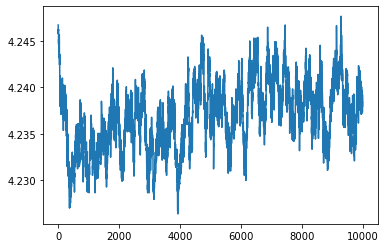

In [47]:
N =  1e4
t0 = time()
voltage = np.array(chA.get_samples(N))[:,0]
t1 = time()
print("%.1f seconds" % (t1-t0))
print("%e sec per point" % ((t1-t0)/N))
plt.plot(voltage)
plt.show()

Measured voltage for a 4 mA current is about 4.235 V for the PT1000 sensor in the room right now.

The resistance I measure with the DMM is 1078. 

Does that make sense? 

In [48]:
print(4e-3*1078)

4.312


OK, a bit stranget it is a bit off. Which do I trust? 

The PT1000 has a resistance of 1000 ohms at 0 degrees C, and a first order calibration extrapolates to zero resistance at zero temperature.

In [53]:
T_in_K = 273/1000*1078
T_in_C = T_in_K - 273
print(T_in_K)
print(T_in_C)

294.29400000000004
21.29400000000004


That seems about right. 

Let's check the ALM assuming 4 mA:

In [55]:
print(4.24/4e-3*273/1000)
print(4.24/4e-3*273/1000-273)

289.38
16.379999999999995


Seems a bit cold? I wonder what the DAC steps are in the sourcing mode of the ALM1000?

Maybe we need to calibrate some offsets and gains.

Let's try an IV:

In [17]:
I = np.linspace(0,4e-3,100)
V = []
N = 10
for i in I:
    chA.constant(i)
    #time.sleep(0.1)
    print(".",end="")
    chA.get_samples(20) # need to clear the buffer?
    v = np.array(chA.get_samples(N))[:,0]
    V.append(v)

....................................................................................................

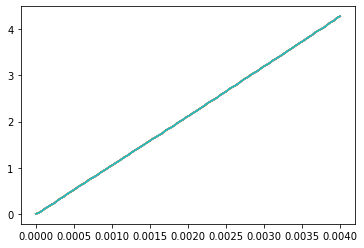

In [18]:
plt.plot(I,V)

Looks pretty linear. Maybe it's a gain calibration problem? 

**In the meantime, had another dead kernel!!! This is going to be a problem...probably should go back to the arduino...**